In [19]:
import sqlite3
import pandas as pd
import numpy as np
import os
from scipy.spatial.distance import cdist
import seaborn as sns
import mpltern
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
from matplotlib.cm import plasma_r
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
rc_fonts = {
    "text.usetex": True,
    "font.size": 20,
    'axes.titlesize': 17,
    "axes.labelsize": 25,
    "legend.fontsize": 10,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    'figure.titlesize': 20,
    'mathtext.default': 'regular',
    'text.latex.preamble': r"\usepackage{bm}",
}
mpl.rcParams.update(rc_fonts)
connection = sqlite3.connect(os.path.join(os.path.dirname(os.path.abspath('__file__')), 'results.db'))

In [2]:
df = pd.read_sql_query("SELECT * FROM results", connection).iloc[1:]
parameter_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
for col in parameter_columns: df[col] = pd.to_numeric(df[col], errors='coerce')
df.loc[df['energy'] > 1, 'energy'] = df['energy'].apply(lambda x: x / 20 if x > 1 else x)
df = df.sort_values(by='energy', ascending=False)
df.describe()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,temp,energy,optimise_ratios
count,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000
mean,2082.000000,0.410421,0.275049,0.314530,-1.415816,2.764888,-1.521079,0.506116,-1.632185,1.117967,153.614029,0.820924,0.615477
std,1201.321564,0.250893,0.244462,0.218515,7.853064,6.384151,6.900658,5.420044,6.471610,6.578784,235.143348,0.005175,0.486541
min,2.000000,0.000000,0.000000,0.000000,-40.600000,-22.970000,-35.760000,-28.250000,-33.630000,-28.700000,1.270775,0.816807,0.000000
25%,1042.000000,0.230000,0.040000,0.140000,-1.810000,2.470000,-0.590000,1.080000,-1.150000,1.110000,6.905414,0.818089,0.000000
50%,2082.000000,0.350000,0.220000,0.280000,-1.810000,2.470000,0.350000,1.080000,-1.150000,1.110000,35.647932,0.819441,1.000000
75%,3122.000000,0.550000,0.430000,0.460000,-1.810000,2.470000,0.350000,1.080000,-1.150000,1.110000,193.711484,0.821547,1.000000
max,4162.000000,1.000000,1.000000,1.000000,36.960000,32.320000,24.270000,28.660000,30.190000,32.070000,1000.000000,0.837501,1.000000


In [3]:
min_energy = df[df['energy'] == df['energy'].min()][['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']]
print(df['energy'].min())
higher_energy = df[df['energy'] > df['energy'].min()][['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']]
min_dists = cdist(min_energy, higher_energy).min(axis=1)
min_energy['min_dist'] = min_dists
max_min_dist_row = min_energy[min_energy['min_dist'] == min_energy['min_dist'].max()]
print(max_min_dist_row[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']])

0.8168073867917591
       p1    p2   p3    p4    p5    p6    p7    p8    p9
418  0.45  0.55  0.0 -1.81  2.47  0.35  1.08 -1.15  1.11


In [24]:
close_df = df[df['energy'] < 0.82][['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9','energy']]
close_df.shape

(2579, 10)

In [25]:

kmeans = KMeans(n_clusters=10, random_state=0).fit(close_df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']])
centers = kmeans.cluster_centers_
def find_nearest(center, df):
    return np.argmin(np.linalg.norm(df - center, axis=1))

indices = [find_nearest(center, close_df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']].values) for center in centers]

df_nearest = close_df.iloc[indices]
df_nearest

/opt/homebrew/Caskroom/miniconda/base/envs/pyzx/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,p1,p2,p3,p4,p5,p6,p7,p8,p9,energy
112,0.30,0.39,0.31,-1.81,2.47,0.35,1.08,-1.15,1.11,0.816807
827,0.34,0.37,0.29,22.32,2.33,-18.51,1.92,-26.60,-9.51,0.818083
4062,0.50,0.06,0.44,-3.99,1.94,-16.24,-14.81,-11.30,-11.49,0.818678
3667,0.51,0.04,0.45,-13.43,-7.01,-14.67,-2.37,-5.75,-2.45,0.818678
4128,0.50,0.06,0.44,0.68,14.78,-14.58,8.62,-1.26,-10.86,0.818678
3743,0.51,0.04,0.45,-7.08,10.69,-8.13,3.25,0.71,-16.19,0.818678
1140,0.29,0.21,0.50,1.42,-11.92,-8.86,-10.04,-16.48,2.84,0.818083
2779,0.08,0.70,0.22,-11.13,3.59,-5.92,10.02,-6.71,-5.46,0.818083
4019,0.50,0.06,0.44,5.83,10.42,2.09,3.23,-2.41,-5.48,0.818164
736,0.34,0.37,0.29,12.76,16.65,-5.62,-8.72,-21.95,6.17,0.818678


In [9]:
class LogBaseNorm(Normalize):
    def __init__(self, vmin=None, vmax=None, log_base=10, clip=False):
        self.log_base = log_base
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        log_base = self.log_base
        vmin, vmax = self.vmin, self.vmax
        if vmin > vmax:
            raise ValueError("minvalue must be less than or equal to maxvalue")
        elif vmin <= 0:
            raise ValueError("minvalue must be positive")
        with np.errstate(divide='ignore'): 
            result = np.ma.masked_array(np.log(value / vmin) / np.log(vmax / vmin) / np.log(log_base))
        return result

norm = LogBaseNorm(vmin=0.815, vmax=0.840, log_base=1.5)
cmap = plasma_r

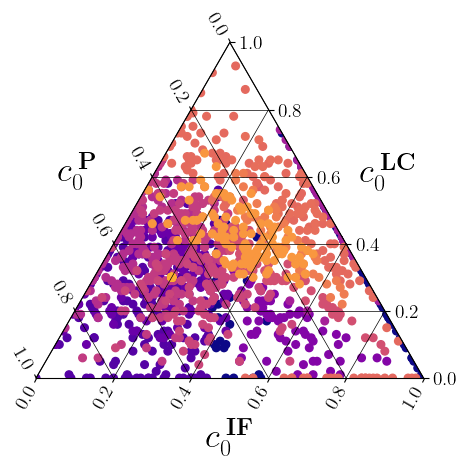

In [10]:
data = df[['p1','p2','p3','energy']]
fig, tax = plt.subplots(subplot_kw={'projection': 'ternary'}, figsize=(5, 5))
tax.set_tlabel(r'$c_0^{\;\bf{LC}}$')
tax.set_llabel(r'$c_0^{\;\bf{P}}$')
tax.set_rlabel(r'$c_0^{\;\bf{IF}}$')
tax.taxis.set_label_position('tick1')
tax.laxis.set_label_position('tick1')
tax.raxis.set_label_position('tick1')
tax.taxis.set_label_rotation_mode('horizontal')
tax.laxis.set_label_rotation_mode('horizontal')
tax.raxis.set_label_rotation_mode('horizontal')
costs = data['energy']
sc = tax.scatter(data['p1'], data['p2'], data['p3'], c=costs, cmap=cmap, s=30, norm=norm, zorder=1)
# cbar = plt.colorbar(sc, location='right', shrink=0.6, pad = 0.1, ticks=np.arange(0.895, 0.935, 0.005))
# cbar.ax.set_title(r'$\textit{Energy}$', loc='left', pad=18)
# cbar.ax.tick_params(labelsize=14)
tax.grid(linestyle='-', linewidth=0.5, color='black', alpha=1, zorder=3)
plt.show()

In [15]:
# fig.savefig('ternary_plot', bbox_inches='tight')

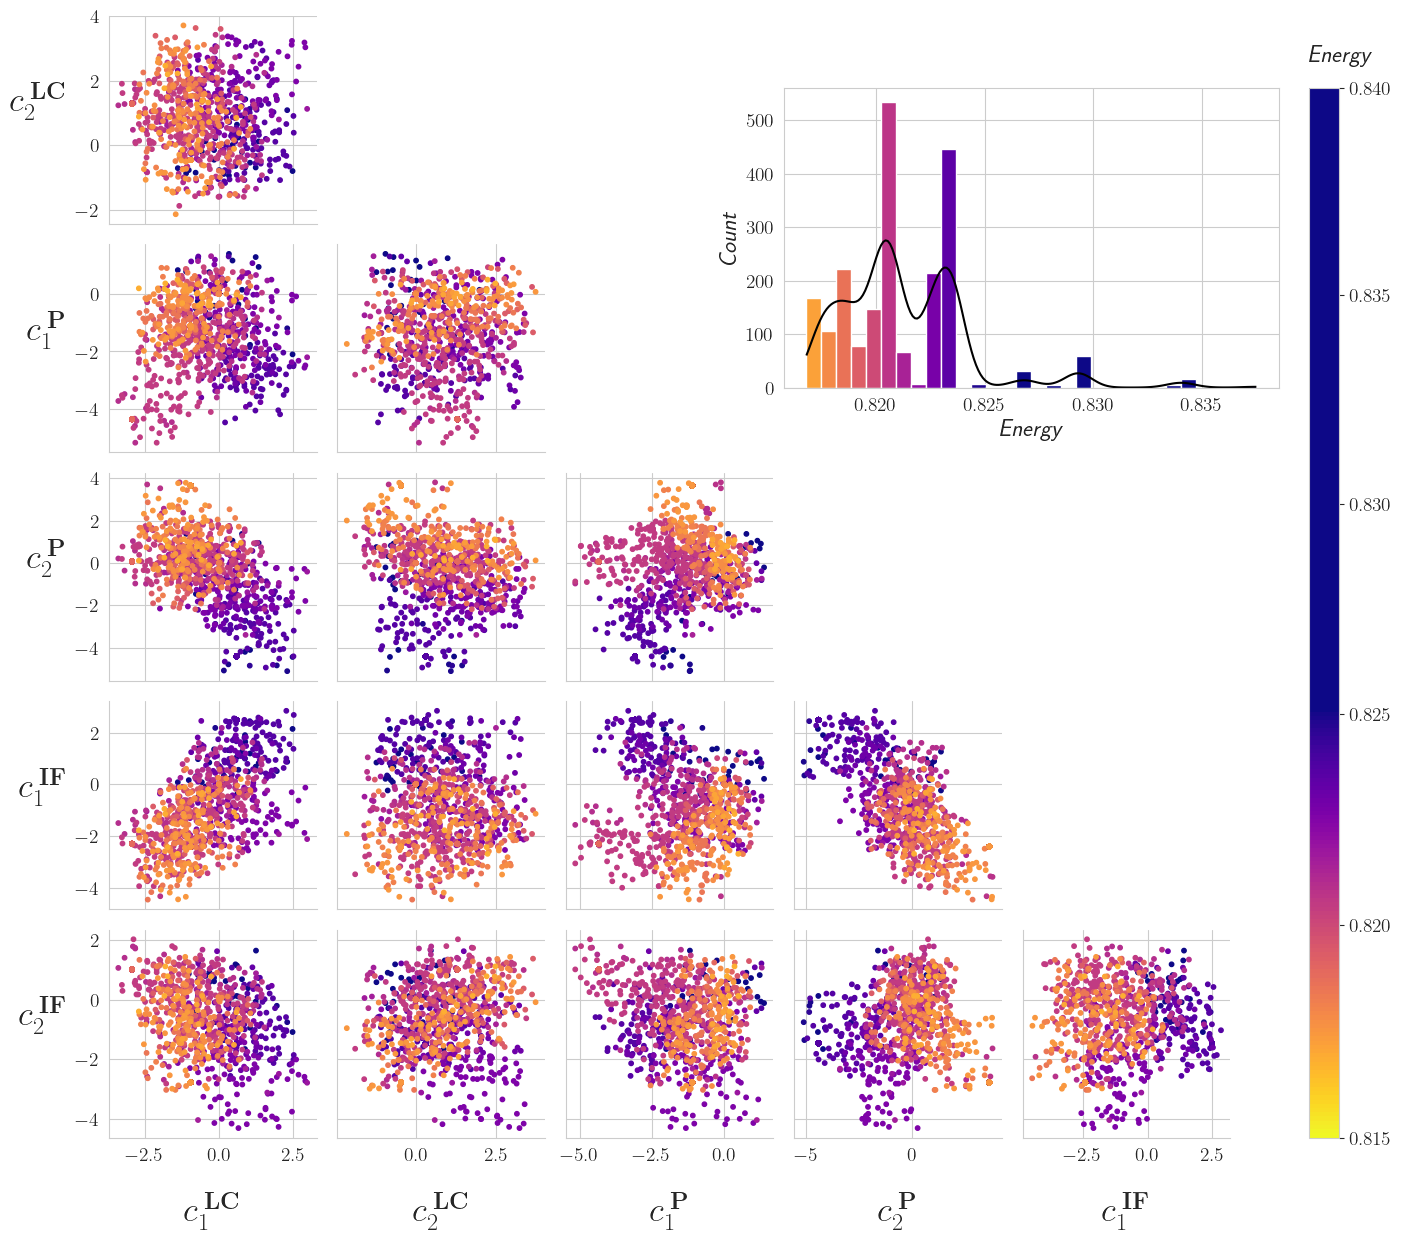

In [11]:
columns_to_plot = ['p4', 'p5', 'p6', 'p7', 'p8', 'p9']
def plot_with_colorbar(x, y, c, **kwargs):
    ax = plt.gca()
    kwargs.pop('color', None)
    points = ax.scatter(x, y, c=c, cmap=cmap, norm=norm, s=10, **kwargs)
    return points

sns.set_style("whitegrid")
g = sns.PairGrid(df[columns_to_plot], corner=True)
g.map_lower(plot_with_colorbar, c=df['energy'])

labels = [r'$c_1^{\;\bf{LC}}$',r'$c_2^{\;\bf{LC}}$',r'$c_1^{\;\bf{P}}$',r'$c_2^{\;\bf{P}}$',r'$c_1^{\;\bf{IF}}$',r'$c_2^{\;\bf{IF}}$']
for i, label in enumerate(labels):
    if g.axes[5, i]: g.axes[5, i].set_xlabel(label, labelpad = 20)
    if g.axes[i, 0]: g.axes[i, 0].set_ylabel(label)

for i, ax in enumerate(g.axes.flat):
    if i % 7 == 0:
        ax.set_visible(False)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

for ax in g.axes.flatten():
    if ax:
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        ax.get_yaxis().set_label_coords(-0.2,0.5)
        ax.yaxis.get_label().set_horizontalalignment('right')
    
cbar_ax = g.fig.add_axes([0.85, 0.05, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
g.fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_title(r'$\textit{Energy}$', loc='left', pad=18)

energy_ax = g.fig.add_axes([0.5, 0.55, 0.33, 0.2])
bins = sns.histplot(df['energy'], bins=30, kde=True, ax=energy_ax)
for bar in bins.containers[1]:
    energy_val = (bar.get_x() + bar.get_width()/2)
    color = cmap(norm(energy_val))
    bar.set_facecolor(color)
line = bins.get_lines()[0]
x = line.get_xdata()
y = line.get_ydata()
segments = [np.column_stack((x, y))]
lc = LineCollection(segments, color='black')
energy_ax.add_collection(lc)
line.remove()
energy_ax.set_xlabel(r'\textit{Energy}', fontsize = 17)
energy_ax.set_ylabel(r'\textit{Count}', fontsize = 17)

plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
plt.show()

In [17]:
# g.fig.savefig('energy_plot.pdf', dpi=300, bbox_inches='tight')

In [18]:
# fig.savefig('ternary2.pdf', dpi=300, bbox_inches='tight')